In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = "../data/datos_act0.xlsx"
data = pd.read_excel(data)
data

,ΔΘ (rad),Vpp (mV),error ΔΘ (rad),error Vpp (mV),ΔΘ_r (rad),Vpp_r (mV),error ΔΘ_r (rad),error Vpp_r (mV)
0,0.0,0,0.005,10,-0.5,2040,0.005,10
1,0.1,312,0.005,10,-0.4,1640,0.005,10
2,0.2,776,0.005,10,-0.3,1220,0.005,10
3,0.3,1160,0.005,10,-0.2,940,0.005,10
4,0.4,1720,0.005,10,-0.1,480,0.005,10
5,0.5,1960,0.005,10,0.0,0,0.005,10


In [3]:
X = data[' Vpp (mV)']
Xerr = data['error Vpp (mV)']

Y = data['ΔΘ (rad)']
Yerr = data['error ΔΘ (rad)']

w = 1/(Yerr**2)

X

0       0
1     312
2     776
3    1160
4    1720
5    1960
Name:  Vpp (mV), dtype: int64

In [4]:
sum_w = w.sum()
sum_wx = (w*X).sum()
sum_wy = (w*Y).sum()
sum_wxx = (w*X**2).sum()
sum_wxy = (w*X*Y).sum()

In [5]:
m = (sum_w*sum_wxy - sum_wx*sum_wy) / (sum_w*sum_wxx - sum_wx**2)
b = (sum_wxx*sum_wy - sum_wx*sum_wxy) / (sum_w*sum_wxx - sum_wx**2)

m_std_err = np.sqrt(sum_w/(sum_w*sum_wxx-sum_wx**2))
b_std_err = np.sqrt(sum_wxx/(sum_w*sum_wxx-sum_wx**2))

In [6]:
print(m)
print(b)

print(m_std_err)
print(b_std_err)

0.00024107706970219418
0.011815855134232141
2.8924183242693654e-06
0.0035118612066817245


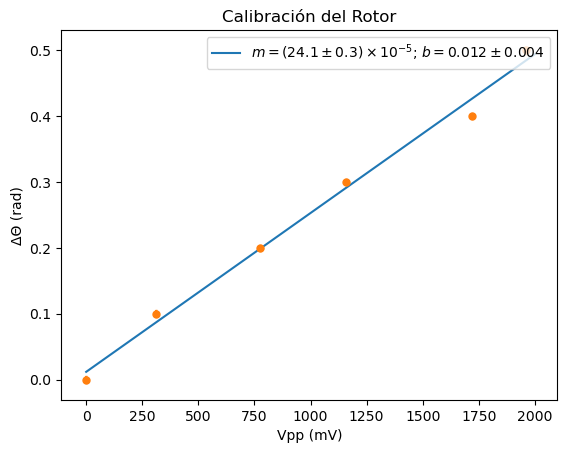

In [7]:
x = np.linspace(0, 2000, 100001)
y = m*x+b

plt.plot(x, y, label = r"$m = (24.1\pm 0.3)\times 10^{-5}$" + "; " + r"$b = 0.012\pm 0.004$")
plt.errorbar(X, Y, Yerr, Xerr, fmt="o", markersize=5, capsize=1)

plt.title("Calibración del Rotor")
plt.ylabel("ΔΘ (rad)")
plt.xlabel("Vpp (mV)")
plt.legend(loc="upper right")

plt.savefig("act0_img1")

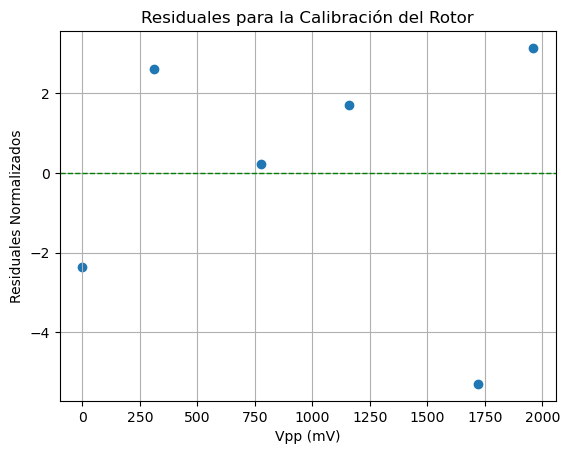

In [8]:
model = m*X+b
res = (Y - model)/Yerr

fig2, (ax2) = plt.subplots(1, 1)

ax2.scatter(X, res)
ax2.axhline(0, color='green', linewidth=1, linestyle='--')

ax2.set_ylabel('Residuales Normalizados')
ax2.set_xlabel('Vpp (mV)')
ax2.set_title('Residuales para la Calibración del Rotor')
ax2.grid()

plt.savefig('act0_img1_res.png', format='png')

In [9]:
X = data[' Vpp_r (mV)']
Xerr = data['error Vpp_r (mV)']

Y = data['ΔΘ_r (rad)']
Yerr = data['error ΔΘ_r (rad)']

w = 1/(Yerr**2)

X

0    2040
1    1640
2    1220
3     940
4     480
5       0
Name:  Vpp_r (mV), dtype: int64

In [10]:
sum_w = w.sum()
sum_wx = (w*X).sum()
sum_wy = (w*Y).sum()
sum_wxx = (w*X**2).sum()
sum_wxy = (w*X*Y).sum()

In [11]:
m = (sum_w*sum_wxy - sum_wx*sum_wy) / (sum_w*sum_wxx - sum_wx**2)
b = (sum_wxx*sum_wy - sum_wx*sum_wxy) / (sum_w*sum_wxx - sum_wx**2)

m_std_err = np.sqrt(sum_w/(sum_w*sum_wxx-sum_wx**2))
b_std_err = np.sqrt(sum_wxx/(sum_w*sum_wxx-sum_wx**2))

In [12]:
print(m)
print(b)

print(m_std_err)
print(b_std_err)

-0.00024959473634023077
0.012906455611709736
2.9899230013050825e-06
0.003753038246655904


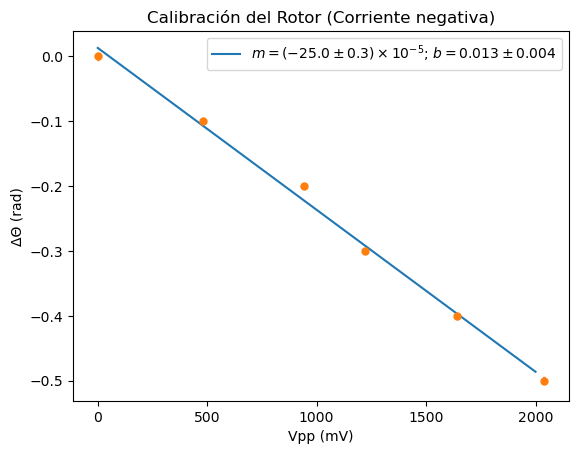

In [13]:
x = np.linspace(0, 2000, 100001)
y = m*x+b

plt.plot(x, y, label = r"$m = (-25.0\pm 0.3)\times 10^{-5}$" + "; " + r"$b = 0.013\pm 0.004$")
plt.errorbar(X, Y, Yerr, Xerr, fmt="o", markersize=5, capsize=1)

plt.title("Calibración del Rotor (Corriente negativa)")
plt.ylabel("ΔΘ (rad)")
plt.xlabel("Vpp (mV)")
plt.legend(loc="upper right")

plt.savefig("act0_img2")

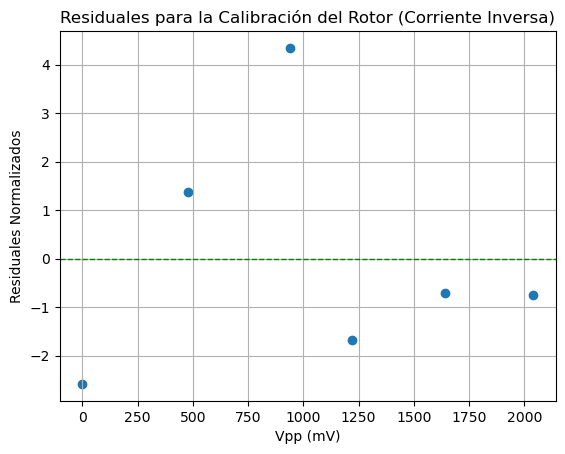

In [14]:
model = m*X+b
res = (Y - model)/Yerr

fig2, (ax2) = plt.subplots(1, 1)

ax2.scatter(X, res)
ax2.axhline(0, color='green', linewidth=1, linestyle='--')

ax2.set_ylabel('Residuales Normalizados')
ax2.set_xlabel('Vpp (mV)')
ax2.set_title('Residuales para la Calibración del Rotor (Corriente Inversa)')
ax2.grid()

plt.savefig('act0_img2_res.png', format='png')